# Exploratory Data Analysis

In [1]:
import sys
import os
import warnings
warnings.filterwarnings('ignore')
sys.path.append('../scripts')
from data_loader import *
from eda import *

## Load Datasets

In [3]:
# path to the CSV file
filename1 = 'brent_oil_price.parquet'
filename2 = 'gdp_rate.parquet'

path1 = os.path.join('..', 'data/processed', filename1)
path2 = os.path.join('..', 'data/processed', filename2)

# Load dataset
brent_oil_df = load_data(path1)
gdp_data = load_data(path2)

## Brent Oil Time Series Plot

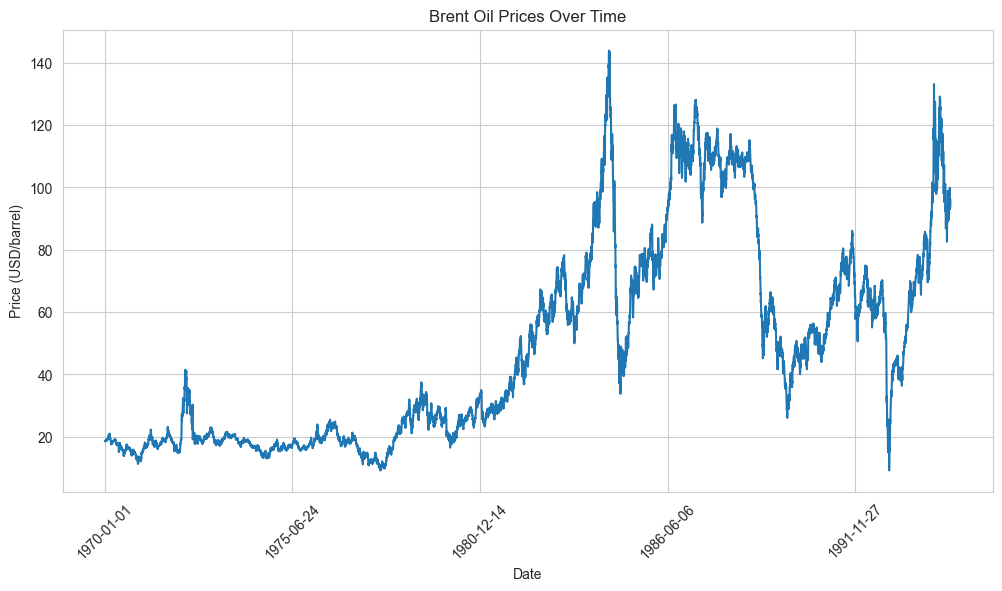

In [12]:
plot_brent_oil_prices(brent_oil_df)

# Summary statistics

In [13]:
summary_stats = brent_oil_df['Price'].describe()
display(summary_stats)

count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64

## Distribution of Brent oil prices 

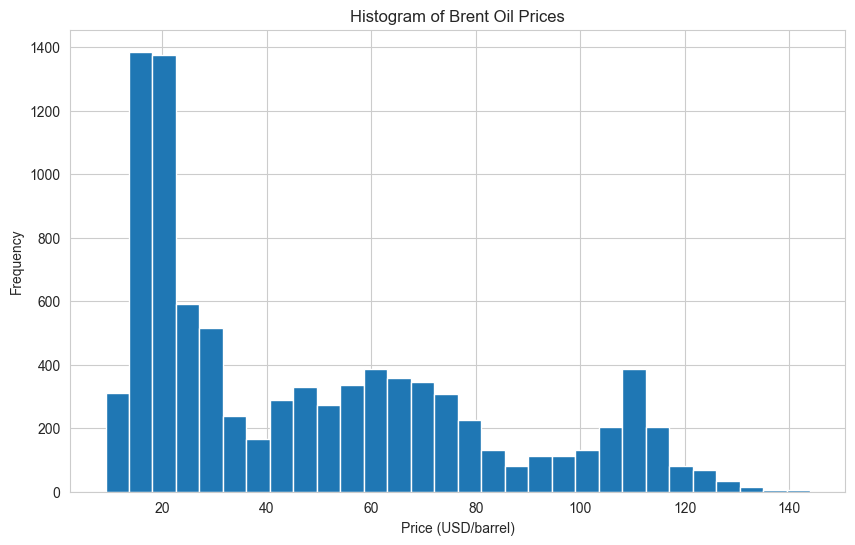

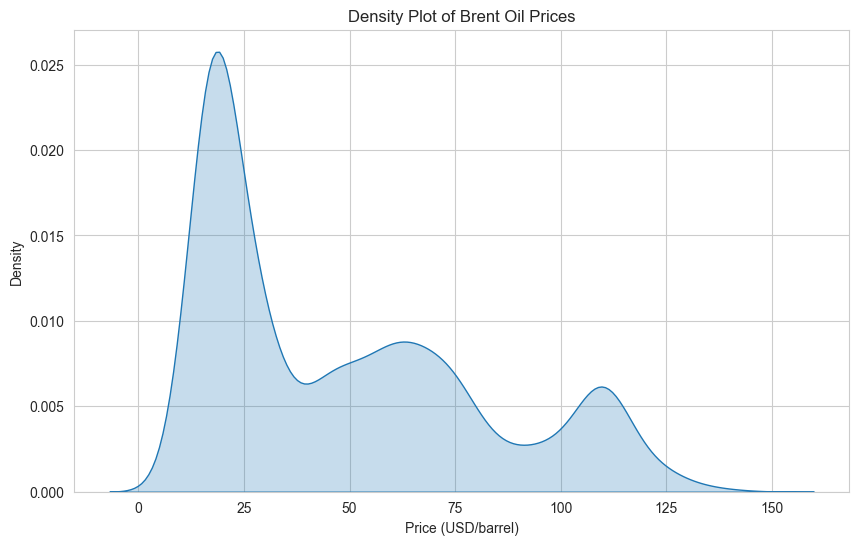

In [14]:
analyze_brent_oil_price_distribution(brent_oil_df)

##  Stationarity Analysis

In [15]:
# Check the stationarity of the Brent oil price time series
diff_level = check_stationarity(brent_oil_df)
diff_level

The Brent oil price time series is non-stationary.
The Brent oil price time series becomes stationary after 1 level(s) of differencing.


1

## Visualize the ACF and PACF plots

<Figure size 1000x600 with 0 Axes>

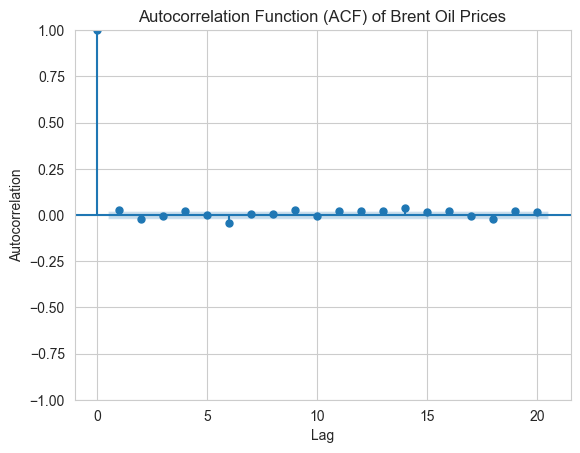

<Figure size 1000x600 with 0 Axes>

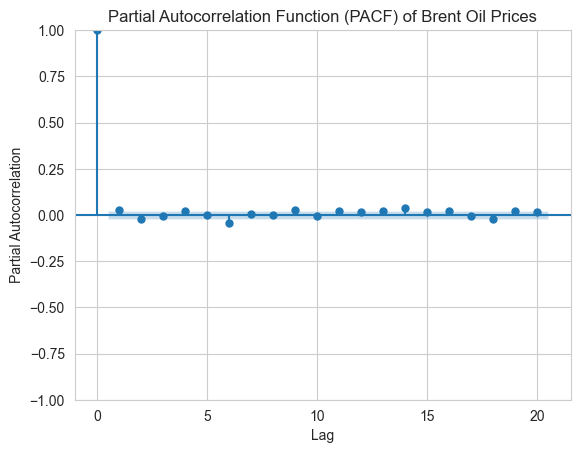

In [16]:
visualize_acf_pacf(brent_oil_df, diff_level)

## Exploring Other Potential Factors Influencing Oil Prices

### Correlation between GDP growth rates of major economies and oil prices

In [17]:
gdp_data

Country  1987  1988  1989  1990  1991  1992  1993  1994  1995  ...  \
0          Brazil   3.6   0.3   3.2  -4.2   1.0  -0.5   4.7   5.3   4.4  ...   
1          Canada   4.1   4.4   2.3   0.2  -2.1   0.9   2.7   4.5   2.7  ...   
2           China  11.7  11.2   4.2   3.9   9.0  14.3  13.9  13.0  11.0  ...   
3          France   2.6   4.7   4.3   2.9   1.0   1.6  -0.6   2.4   2.1  ...   
4         Germany   1.5   3.7   3.9   5.7   5.0   1.9  -1.0   2.4   1.5  ...   
5           Italy   3.2   4.2   3.4   2.1   1.4   0.8  -0.9   2.2   2.9  ...   
6           Japan   4.6   6.7   4.9   4.8   3.5   0.9  -0.5   1.1   2.6  ...   
7  United Kingdom   5.4   5.4   2.4   0.6  -1.4   0.2   2.3   3.4   2.4  ...   
8   United States   3.5   4.2   3.7   1.9  -0.1   3.5   2.8   4.0   2.7  ...   

   2013  2014  2015  2016  2017  2018  2019  2020  2021  2022  
0   3.0   0.5  -3.5  -3.3   1.3   1.8   1.2  -3.3   4.8   3.0  
1   2.3   2.9   0.6   1.0   3.0   2.7   1.9  -5.0   5.3   3.8  
2   7.8   7.4   7.0   6.9   6.9   6.8   6.0   2.2   8.4   3.0  
3   0.6   1.0   1.1   1.1   2.3   1.9   1.8  -7.5   6.3   2.5  
4   0.4   2.2   1.5   2.2   2.7   1.0   1.1  -3.8   3.2   1.8  
5  -1.8   0.0   0.8   1.3   1.7   0.9   0.5  -9.0   8.3   4.0  
6   2.0   0.3   1.6   0.8   1.7   0.6  -0.4  -4.1   2.6   1.0  
7   1.8   3.2   2.2   1.9   2.7   1.4   1.6 -10.4   8.7   4.3  
8   2.1   2.5   2.9   1.8   2.5   3.0   2.5  -2.2   5.8   1.9  

[9 rows x 37 columns]

## Transpose the data

In [18]:
gdp_data = gdp_data.set_index('Country').transpose()

# Convert the index to datetime format
gdp_data.index = pd.to_datetime(gdp_data.index + '-12-31', format='%Y-%m-%d')
gdp_data = gdp_data.rename_axis('Date')

In [19]:
gdp_data.head()

Country     Brazil  Canada  China  France  Germany  Italy  Japan  \
Date                                                               
1987-12-31     3.6     4.1   11.7     2.6      1.5    3.2    4.6   
1988-12-31     0.3     4.4   11.2     4.7      3.7    4.2    6.7   
1989-12-31     3.2     2.3    4.2     4.3      3.9    3.4    4.9   
1990-12-31    -4.2     0.2    3.9     2.9      5.7    2.1    4.8   
1991-12-31     1.0    -2.1    9.0     1.0      5.0    1.4    3.5   

Country     United Kingdom  United States  
Date                                       
1987-12-31             5.4            3.5  
1988-12-31             5.4            4.2  
1989-12-31             2.4            3.7  
1990-12-31             0.6            1.9  
1991-12-31            -1.4           -0.1

In [20]:
brent_oil_df['Date'] = pd.to_datetime(brent_oil_df['Date'])

brent_oil_df.set_index('Date', inplace=True)

# Resample Brent oil price data to yearly frequency
df_yearly = brent_oil_df.resample('Y').mean()

df_yearly.head()

Price
Date                 
1987-12-31  18.525813
1988-12-31  14.905412
1989-12-31  18.228228
1990-12-31  23.761445
1991-12-31  20.041128

## Merge the two datasets on the date

In [21]:
merged_data = pd.merge(df_yearly, gdp_data, left_index=True, right_index=True, how='inner')
merged_data.head()

Price  Brazil  Canada  China  France  Germany  Italy  Japan  \
Date                                                                          
1987-12-31  18.525813     3.6     4.1   11.7     2.6      1.5    3.2    4.6   
1988-12-31  14.905412     0.3     4.4   11.2     4.7      3.7    4.2    6.7   
1989-12-31  18.228228     3.2     2.3    4.2     4.3      3.9    3.4    4.9   
1990-12-31  23.761445    -4.2     0.2    3.9     2.9      5.7    2.1    4.8   
1991-12-31  20.041128     1.0    -2.1    9.0     1.0      5.0    1.4    3.5   

            United Kingdom  United States  
Date                                       
1987-12-31             5.4            3.5  
1988-12-31             5.4            4.2  
1989-12-31             2.4            3.7  
1990-12-31             0.6            1.9  
1991-12-31            -1.4           -0.1

In [22]:
# Define output folder and file name
output_folder = os.path.join('..', 'data', 'processed')
filename = 'merged_oil_gdp_rate.parquet'

output_path = save_data(merged_data, output_folder, filename)

Dataset saved to ..\data\processed\merged_oil_gdp_rate.parquet


In [23]:
# path to the CSV file
filename1 = 'merged_oil_gdp_rate.parquet'


path1 = os.path.join('..', 'data/processed', filename1)
# Load dataset
merged_data = load_data(path1)

In [24]:
merged_data.head()

Price  Brazil  Canada  China  France  Germany  Italy  Japan  \
Date                                                                          
1987-12-31  18.525813     3.6     4.1   11.7     2.6      1.5    3.2    4.6   
1988-12-31  14.905412     0.3     4.4   11.2     4.7      3.7    4.2    6.7   
1989-12-31  18.228228     3.2     2.3    4.2     4.3      3.9    3.4    4.9   
1990-12-31  23.761445    -4.2     0.2    3.9     2.9      5.7    2.1    4.8   
1991-12-31  20.041128     1.0    -2.1    9.0     1.0      5.0    1.4    3.5   

            United Kingdom  United States  
Date                                       
1987-12-31             5.4            3.5  
1988-12-31             5.4            4.2  
1989-12-31             2.4            3.7  
1990-12-31             0.6            1.9  
1991-12-31            -1.4           -0.1

                   Price    Brazil    Canada     China    France   Germany  \
Price           1.000000  0.191112 -0.041023 -0.195882 -0.146652 -0.047986   
Brazil          0.191112  1.000000  0.534353  0.519732  0.340041  0.163162   
Canada         -0.041023  0.534353  1.000000  0.277877  0.807043  0.447600   
China          -0.195882  0.519732  0.277877  1.000000  0.175919  0.047597   
France         -0.146652  0.340041  0.807043  0.175919  1.000000  0.743587   
Germany        -0.047986  0.163162  0.447600  0.047597  0.743587  1.000000   
Italy          -0.214073  0.336034  0.745425  0.165416  0.940203  0.730404   
Japan          -0.218081  0.196225  0.438525  0.125893  0.667687  0.740261   
United Kingdom -0.069911  0.415623  0.901771  0.279230  0.880076  0.527839   
United States  -0.274190  0.300674  0.851988  0.258846  0.801546  0.489638   

                   Italy     Japan  United Kingdom  United States  
Price          -0.214073 -0.218081       -0.069911      -0.274190  
Brazi

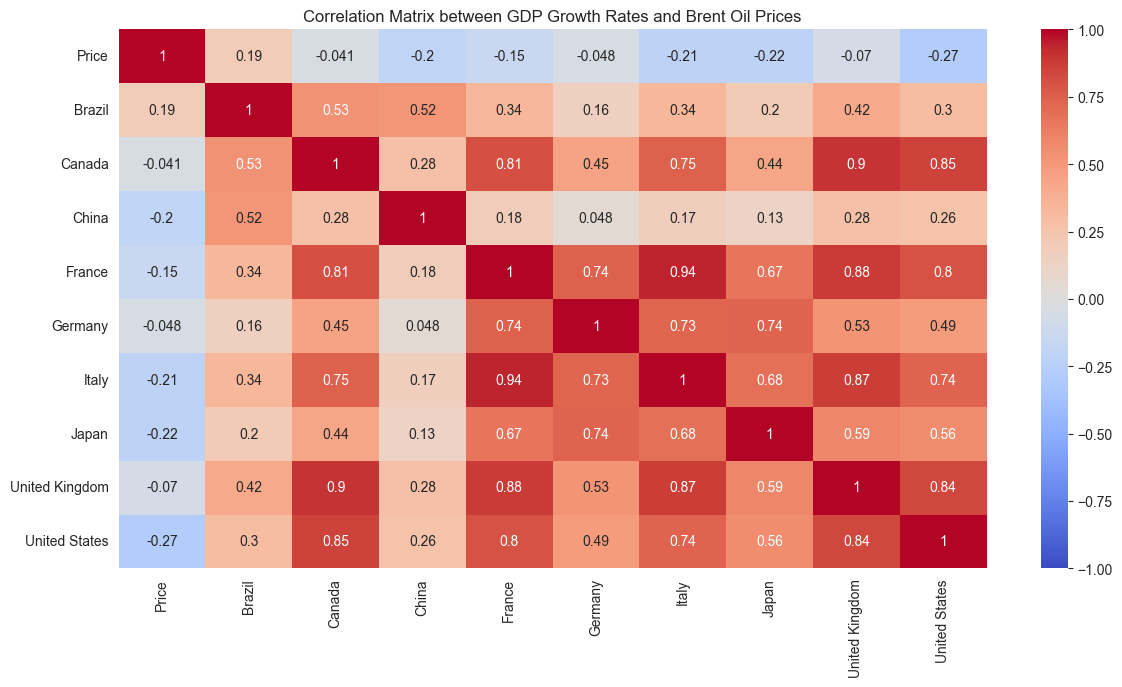

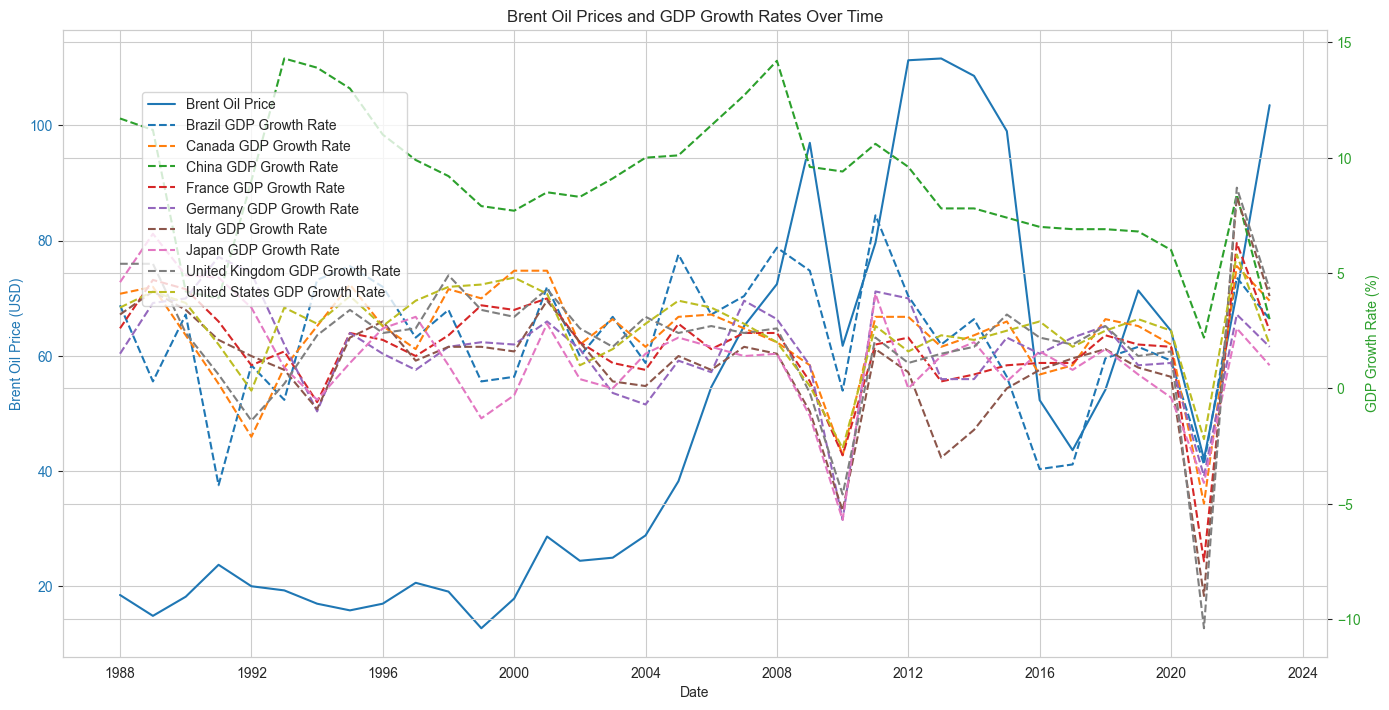

In [25]:
analyze_gdp_and_oil_prices(merged_data)

# Relationship between Unemployment rates & Oil consumption patterns

In [2]:
# path to the CSV file
filename3 = 'world_oil_consumption.csv'

filename4 = 'world_umemployment_rate.csv'
path1 = os.path.join('..', 'data/raw', filename3)
path2 = os.path.join('..', 'data/raw', filename4)

# Load dataset
oil_consumption_df = load_data(path1)
unemployment_rate_df = load_data(path2)

In [3]:
oil_consumption_df

Country         1991         1992         1993        1994        1995  \
0   World  66930.59273  67185.41879  66989.72191  68376.3034  69797.4446   

          1996         1997         1998       1999  ...        2013  \
0  71870.46613  73083.80539  73902.69465  75523.216  ...  92159.7727   

          2014         2015         2016         2017         2018  \
0  93695.77471  95474.73849  96960.72652  99064.62705  100064.7229   

          2019         2020         2021        2022  
0  100848.8289  91692.33623  97558.73209  99844.6326  

[1 rows x 33 columns]

In [4]:
unemployment_rate_df

Country     1991      1992      1993      1994      1995      1996  \
0   World  4.99634  5.149939  5.417837  5.667754  5.820786  5.908678   

       1997      1998      1999  ...      2013      2014      2015      2016  \
0  5.954036  6.125231  6.265528  ...  6.167134  6.016229  6.048849  6.010331   

       2017      2018     2019      2020      2021      2022  
0  5.916141  5.756398  5.58298  6.585288  6.033761  5.264616  

[1 rows x 33 columns]

## Transposing the Datasets

In [5]:
oil_consumption_df = oil_consumption_df.set_index('Country').transpose()

# Convert the index to datetime format
oil_consumption_df.index = pd.to_datetime(oil_consumption_df.index + '-12-31', format='%Y-%m-%d')
oil_consumption_df = oil_consumption_df.rename_axis('Date')

In [6]:
oil_consumption_df.head()

Country           World
Date                   
1991-12-31  66930.59273
1992-12-31  67185.41879
1993-12-31  66989.72191
1994-12-31  68376.30340
1995-12-31  69797.44460

In [7]:
unemployment_rate_df = unemployment_rate_df.set_index('Country').transpose()

# Convert the index to datetime format
unemployment_rate_df.index = pd.to_datetime(unemployment_rate_df.index + '-12-31', format='%Y-%m-%d')
unemployment_rate_df = unemployment_rate_df.rename_axis('Date')

In [8]:
unemployment_rate_df.head()

Country        World
Date                
1991-12-31  4.996340
1992-12-31  5.149939
1993-12-31  5.417837
1994-12-31  5.667754
1995-12-31  5.820786

## Merging World Oil Consumption and World Unemploymnet rate Datasets

In [9]:
merged_oil_unemp_data = pd.merge(unemployment_rate_df, oil_consumption_df, left_index=True, right_index=True, how='inner')

In [10]:
merged_oil_unemp_data.head()

Country      World_x      World_y
Date                             
1991-12-31  4.996340  66930.59273
1992-12-31  5.149939  67185.41879
1993-12-31  5.417837  66989.72191
1994-12-31  5.667754  68376.30340
1995-12-31  5.820786  69797.44460

 NOTE: World_x is World Unemployment Reate while	World_y is World oil Consumption

In [ ]:
# Define output folder and file name
output_folder = os.path.join('..', 'data', 'processed')
filename = 'merged_oil_unemp_data.parquet'

output_path = save_data(merged_oil_unemp_data, output_folder, filename)

In [11]:
# path to the CSV file
filename1 = 'merged_oil_unemp_data.parquet'


path1 = os.path.join('..', 'data/processed', filename1)
# Load dataset
merged_oil_unemp_data = load_data(path1)

## Analyzing and visualizes the relationship between unemployment rates and oil consumption patterns

Correlation Matrix:
Country   World_x   World_y
Country                    
World_x  1.000000  0.212461
World_y  0.212461  1.000000


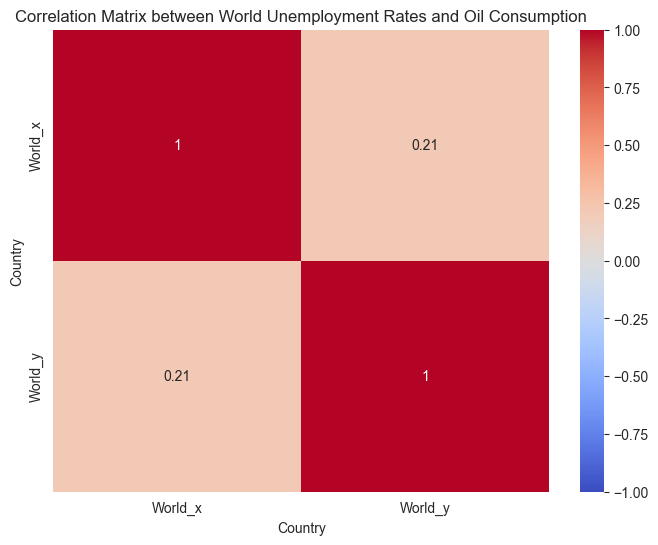

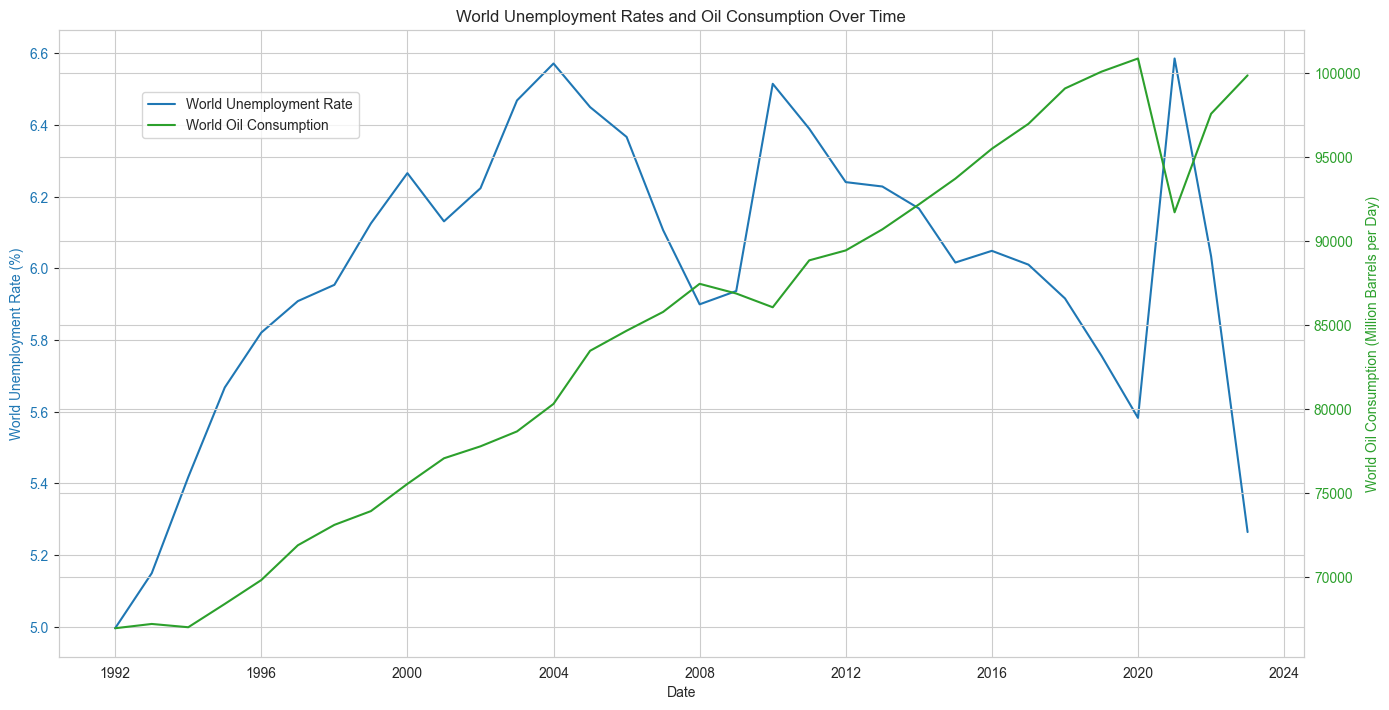

In [12]:
analyze_unemployment_and_oil_consumption(merged_oil_unemp_data)

#### NOTE: World_x is World Unemployment Rates while World_y is World oil Consumption

## Filtering the data points after 2012 and analyzing the correlation

In [16]:
filtered_df = merged_oil_unemp_data[merged_oil_unemp_data.index > '2010-12-31']

Correlation Matrix:
Country   World_x   World_y
Country                    
World_x  1.000000 -0.811527
World_y -0.811527  1.000000


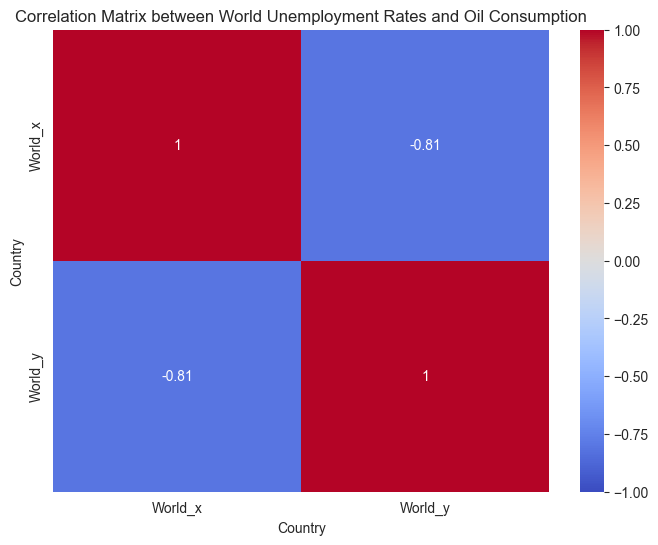

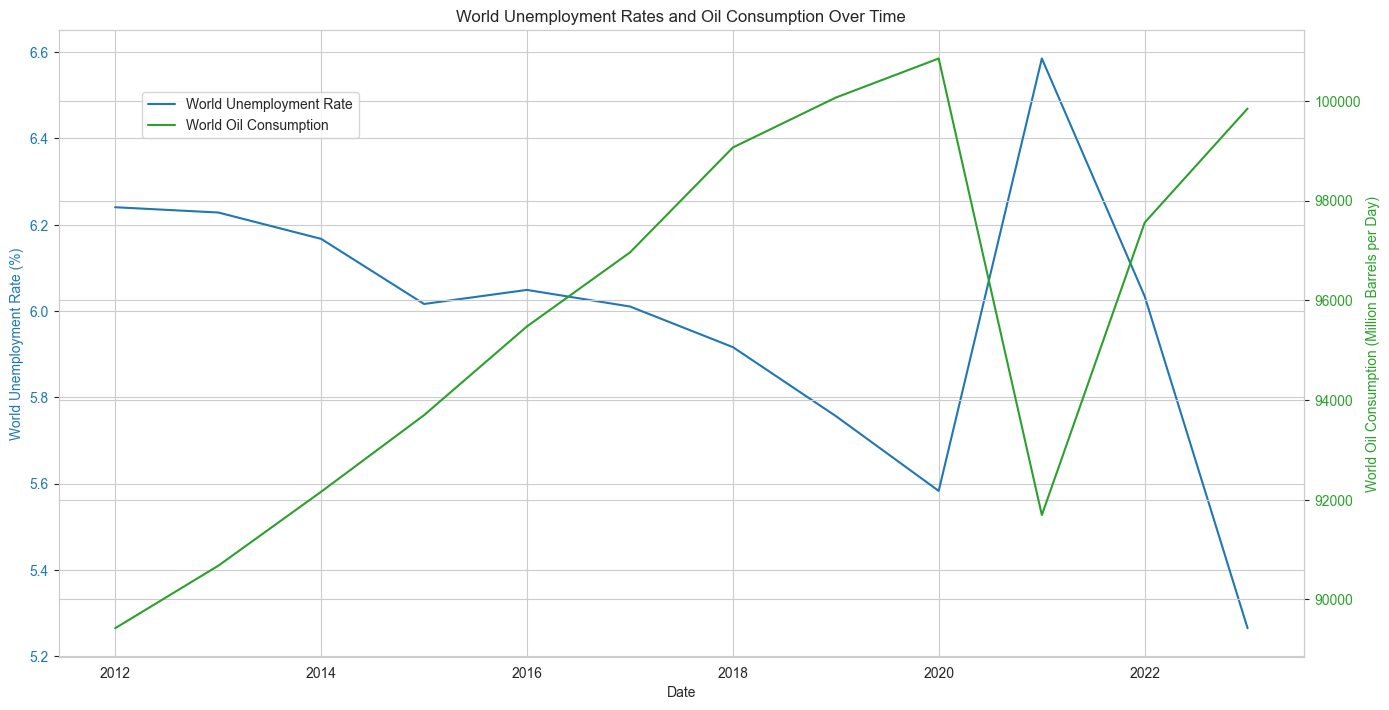

In [17]:
analyze_unemployment_and_oil_consumption(filtered_df)

# Analizing the Effect of currency fluctuations (the USD) , on oil prices.

In [29]:
# path to the CSV file
filename5 = 'usd_ex_rate_df.parquet'
path5 = os.path.join('..', 'data/processed', filename5)

# Load dataset
usd_rate_df = load_data(path5)

In [27]:
brent_oil_df.head()

Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63

In [24]:
brent_oil_df['Date'] = pd.to_datetime(brent_oil_df['Date'])

brent_oil_df.set_index('Date', inplace=True)

# Resample Brent oil price data to yearly frequency
df_yearly = brent_oil_df.resample('Y').mean()

df_yearly.head()

Price
Date                 
1987-12-31  18.525813
1988-12-31  14.905412
1989-12-31  18.228228
1990-12-31  23.761445
1991-12-31  20.041128

In [30]:
usd_rate_df.head()

Date        Open        High         Low       Close   Adj Close  \
0  1987-01-02  103.400002  103.639999  103.339996  103.610001  103.610001   
2  1987-01-05  103.809998  104.349998  103.430000  104.139999  104.139999   
3  1987-01-06  103.779999  103.849998  103.519997  103.699997  103.699997   
4  1987-01-07  104.089996  104.269997  103.959999  104.080002  104.080002   
5  1987-01-08  104.180000  104.230003  103.529999  103.559998  103.559998   

   Volume  
0     0.0  
2     0.0  
3     0.0  
4     0.0  
5     0.0

In [31]:
usd_rate_df['Date'] = pd.to_datetime(usd_rate_df['Date'])

usd_rate_df.set_index('Date', inplace=True)

# Resample Brent oil price data to yearly frequency
df_yearly_usd = usd_rate_df.resample('Y').mean()

df_yearly_usd.head()

Open       High        Low      Close  Adj Close  Volume
Date                                                                     
1987-12-31  96.828038  97.067885  96.537538  96.777423  96.777423     0.0
1988-12-31  92.692874  92.910000  92.454138  92.673640  92.673640     0.0
1989-12-31  98.491423  98.768000  98.167769  98.464385  98.464385     0.0
1990-12-31  88.987854  89.200766  88.722069  88.938008  88.938008     0.0
1991-12-31  89.722146  90.015785  89.387778  89.688008  89.688008     0.0

## Merging the datasets

In [32]:
merged_usd_oil_data = pd.merge(df_yearly, df_yearly_usd, left_index=True, right_index=True, how='inner')

In [33]:
merged_usd_oil_data.head()

Price       Open       High        Low      Close  Adj Close  \
Date                                                                           
1987-12-31  18.525813  96.828038  97.067885  96.537538  96.777423  96.777423   
1988-12-31  14.905412  92.692874  92.910000  92.454138  92.673640  92.673640   
1989-12-31  18.228228  98.491423  98.768000  98.167769  98.464385  98.464385   
1990-12-31  23.761445  88.987854  89.200766  88.722069  88.938008  88.938008   
1991-12-31  20.041128  89.722146  90.015785  89.387778  89.688008  89.688008   

            Volume  
Date                
1987-12-31     0.0  
1988-12-31     0.0  
1989-12-31     0.0  
1990-12-31     0.0  
1991-12-31     0.0

In [34]:
# Define output folder and file name
output_folder = os.path.join('..', 'data', 'processed')
filename = 'merged_usd_oil_data.parquet'

output_path = save_data(merged_usd_oil_data, output_folder, filename)

Dataset saved to ..\data\processed\merged_usd_oil_data.parquet


In [3]:
# path to the CSV file
filename1 = 'merged_usd_oil_data.parquet'


path1 = os.path.join('..', 'data/processed', filename1)
# Load dataset
merged_usd_oil_data= load_data(path1)


Correlation Matrix:
          Close     Price
Close  1.000000 -0.498962
Price -0.498962  1.000000


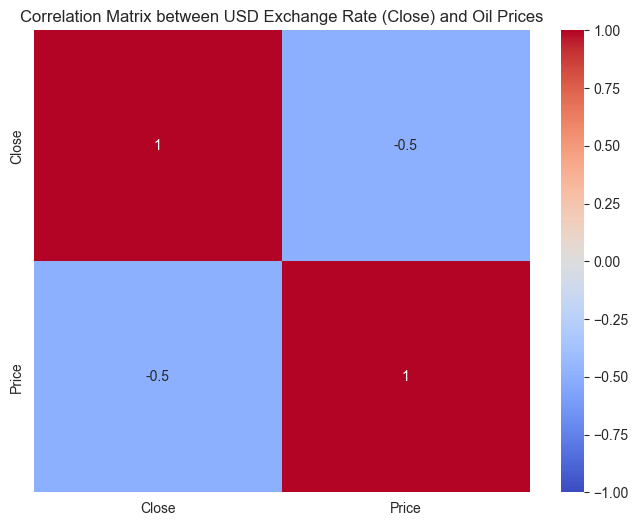

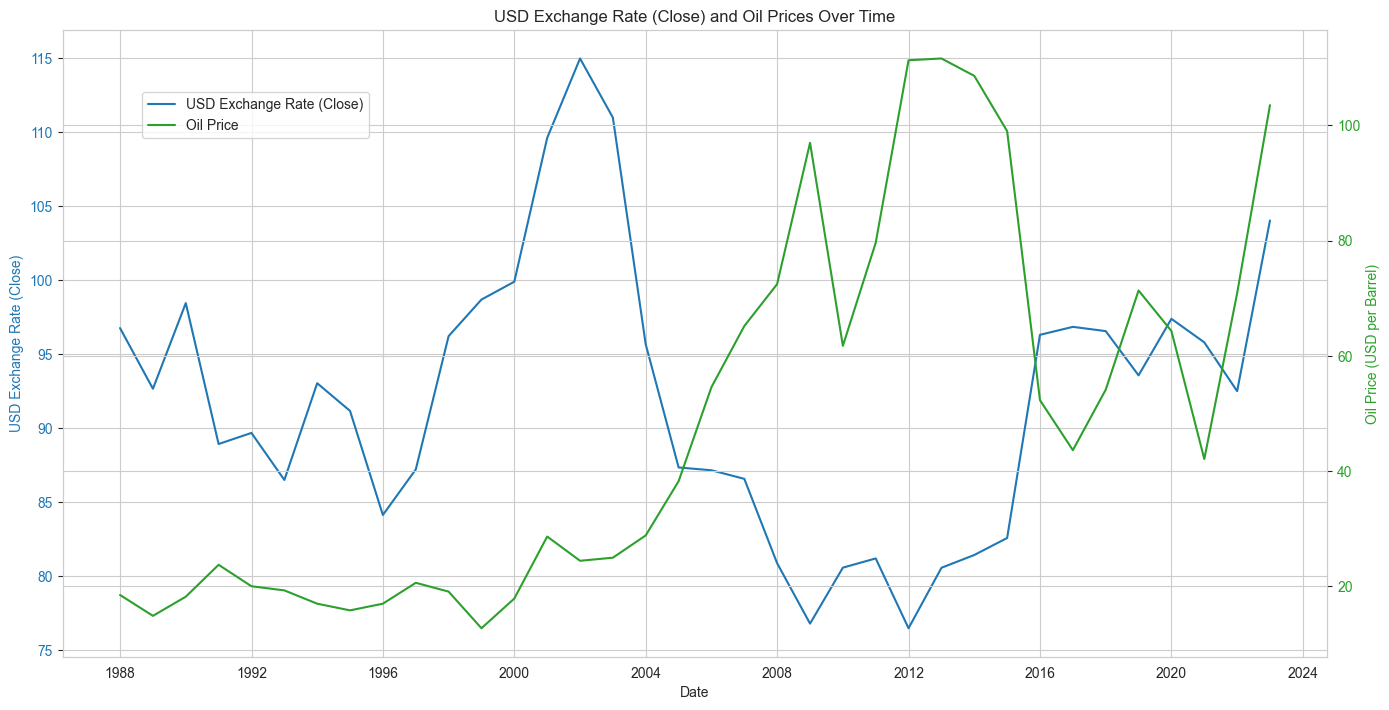

In [5]:
analyze_exchange_rates_and_oil_prices(merged_usd_oil_data)

In [4]:
# path to the CSV file
filename1 = 'final_renewables_data.csv'


path1 = os.path.join('..', 'data/raw', filename1)
# Load dataset
renewable_energy_df = load_data(path1)

In [5]:
renewable_energy_df.head()

Date  Share
0  1990   6.34
1  1991   6.47
2  1992   6.62
3  1993   6.68
4  1994   6.75

In [5]:
renewable_energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    33 non-null     int64  
 1   Share   33 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 660.0 bytes


In [23]:
renewable_energy_df['Date'] = pd.to_datetime(renewable_energy_df['Date'])

In [6]:
renewable_energy_df['Date'] = pd.to_datetime(renewable_energy_df['Date'].astype(str) + '-12-31', format='%Y-%m-%d')

In [8]:
brent_oil_df

Date  Price
0    1987-05-20  18.63
1    1987-05-21  18.45
2    1987-05-22  18.55
3    1987-05-25  18.60
4    1987-05-26  18.63
...         ...    ...
9006 2022-11-08  96.85
9007 2022-11-09  93.05
9008 2022-11-10  94.25
9009 2022-11-11  96.37
9010 2022-11-14  93.59

[9011 rows x 2 columns]

In [10]:
brent_oil_df.set_index('Date', inplace=True)

In [11]:
brent_oil_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33 entries, 1990-12-31 to 2022-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   33 non-null     float64
dtypes: float64(1)
memory usage: 528.0 bytes


In [9]:
import pandas as pd

# Filter the oil price dataset to dates >= 1990-01-02 and <= 2022-11-14
start_date = '1990-01-02'
end_date = '2022-11-14'
brent_oil_df = brent_oil_df[(brent_oil_df['Date'] >= start_date) & (brent_oil_df['Date'] <= end_date)]

In [11]:
brent_oil_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8342 entries, 669 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    8342 non-null   datetime64[ns]
 1   Price   8342 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 195.5 KB


In [13]:
# Aggregate the oil price data by year (calculate the mean)
brent_oil_df['Year'] = brent_oil_df['Date'].dt.year
brent_oil_df = brent_oil_df.groupby('Year')['Price'].mean().reset_index()

In [14]:
brent_oil_df.head()

Year      Price
0  1990  23.761445
1  1991  20.041128
2  1992  19.319728
3  1993  17.013413
4  1994  15.856389

In [17]:
# Convert the 'Year' column back to datetime format for merging
brent_oil_df['Date'] = pd.to_datetime(brent_oil_df['Year'].astype(str) + '-12-31')

In [18]:
brent_oil_df.head()

Year      Price       Date
0  1990  23.761445 1990-12-31
1  1991  20.041128 1991-12-31
2  1992  19.319728 1992-12-31
3  1993  17.013413 1993-12-31
4  1994  15.856389 1994-12-31

In [20]:
brent_oil_df = brent_oil_df.drop(columns=['Year'])

In [21]:
brent_oil_df

Price       Date
0    23.761445 1990-12-31
1    20.041128 1991-12-31
2    19.319728 1992-12-31
3    17.013413 1993-12-31
4    15.856389 1994-12-31
5    17.015850 1995-12-31
6    20.639803 1996-12-31
7    19.108508 1997-12-31
8    12.758103 1998-12-31
9    17.901566 1999-12-31
10   28.660672 2000-12-31
11   24.455720 2001-12-31
12   24.993255 2002-12-31
13   28.850814 2003-12-31
14   38.259693 2004-12-31
15   54.574553 2005-12-31
16   65.161765 2006-12-31
17   72.441160 2007-12-31
18   96.944348 2008-12-31
19   61.738770 2009-12-31
20   79.609444 2010-12-31
21  111.264274 2011-12-31
22  111.570683 2012-12-31
23  108.555000 2013-12-31
24   98.969606 2014-12-31
25   52.316549 2015-12-31
26   43.638000 2016-12-31
27   54.124805 2017-12-31
28   71.335000 2018-12-31
29   64.319845 2019-12-31
30   42.101016 2020-12-31
31   70.855336 2021-12-31
32  103.477545 2022-12-31

In [22]:
# Merge the datasets
merged_oil_renewable_df = pd.merge(renewable_energy_df, brent_oil_df[['Date', 'Price']], on='Date', how='left')

In [24]:
merged_oil_renewable_df = merged_oil_renewable_df.rename(columns={'Share': 'Renewable_Share'})

In [26]:
merged_oil_renewable_df = merged_oil_renewable_df.rename(columns={'Price': 'Oil_Price'})

In [27]:
merged_oil_renewable_df.head()

Date  Renewable_Share  Oil_Price
0 1990-12-31             6.34  23.761445
1 1991-12-31             6.47  20.041128
2 1992-12-31             6.62  19.319728
3 1993-12-31             6.68  17.013413
4 1994-12-31             6.75  15.856389

In [28]:
# Define output folder and file name
output_folder = os.path.join('..', 'data', 'processed')
filename = 'merged_oil_renewable_df.parquet'

output_path = save_data(merged_oil_renewable_df, output_folder, filename)

Dataset saved to ..\data\processed\merged_oil_renewable_df.parquet


In [2]:
# path to the CSV file
filename1 = 'merged_oil_renewable_df.parquet'


path1 = os.path.join('..', 'data/processed', filename1)
# Load dataset
merged_oil_renewable_data = load_data(path1)

In [3]:
merged_oil_renewable_data.head()

Date  Renewable_Share  Oil_Price
0 1990-12-31             6.34  23.761445
1 1991-12-31             6.47  20.041128
2 1992-12-31             6.62  19.319728
3 1993-12-31             6.68  17.013413
4 1994-12-31             6.75  15.856389

## Analyzing the impact of renewable energy developments on oil prices using econometric model

C:\Users\Administrator\Downloads\10-Academy\week-10\AiML-brent-oil-price-analysis\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 08, Jul, 2024
Time:                     00:17:58
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    4.45245
Nobs:                     24.0000    HQIC:                   3.08205
Log likelihood:          -61.1554    FPE:                    41.4320
AIC:                      2.58720    Det(Omega_mle):         12.9069
--------------------------------------------------------------------
Results for equation Oil_Price
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                   -266.625164       121.349873           -2.197           0.028
L1.Oil_Price               0.646733         0.308955            2.093           0.036
L1.Renewable_Share        39.966240 

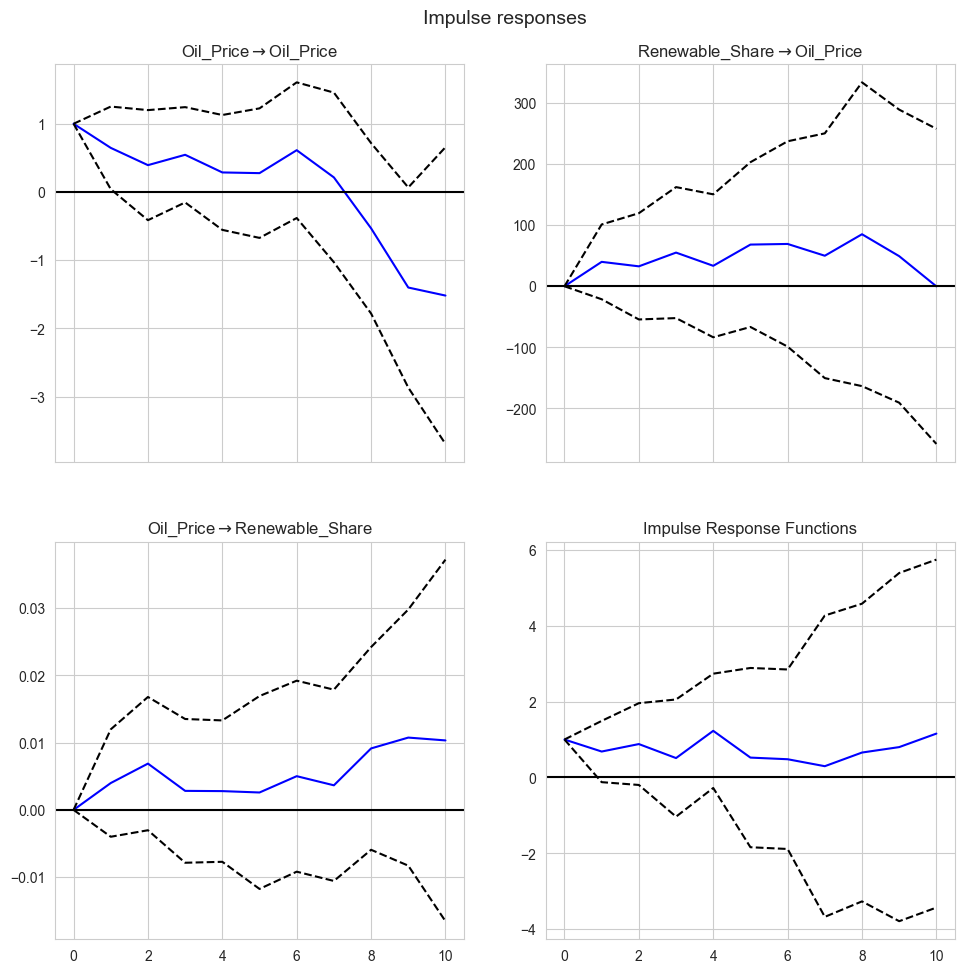

In [4]:
analyze_renewable_energy_impact(merged_oil_renewable_data)

Correlation Matrix:
                 Renewable_Share  Oil_Price
Renewable_Share         1.000000   0.593905
Oil_Price               0.593905   1.000000


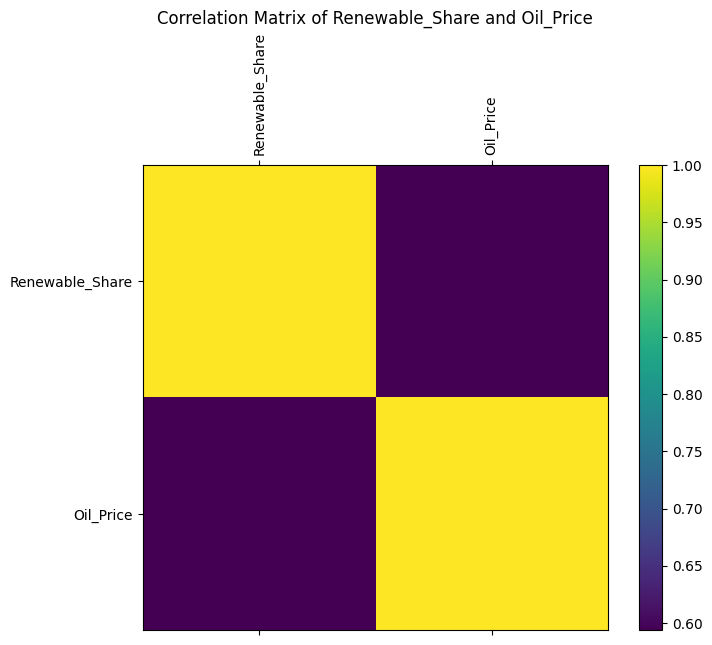


Regression Results:
                            OLS Regression Results                            
Dep. Variable:              Oil_Price   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     16.89
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           0.000269
Time:                        00:06:14   Log-Likelihood:                -154.02
No. Observations:                  33   AIC:                             312.0
Df Residuals:                      31   BIC:                             315.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -33

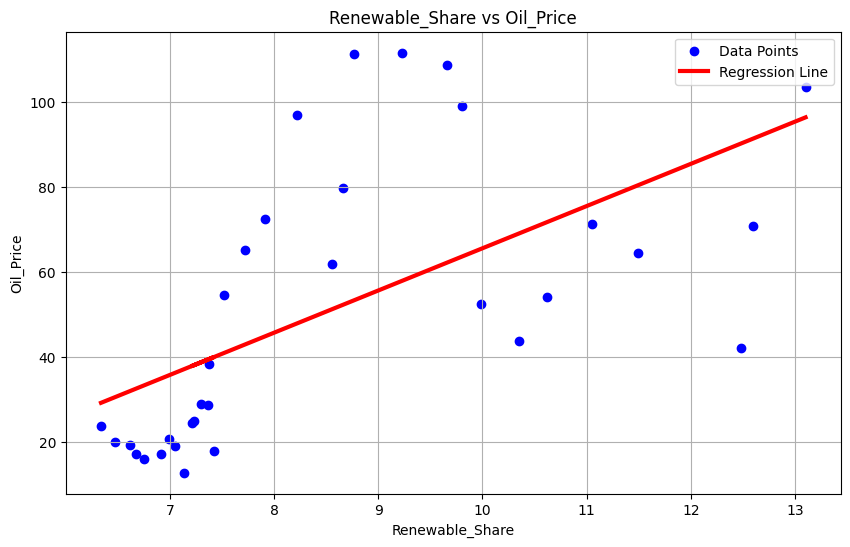


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8573  , p=0.1834  , df_denom=29, df_num=1
ssr based chi2 test:   chi2=2.0495  , p=0.1523  , df=1
likelihood ratio test: chi2=1.9865  , p=0.1587  , df=1
parameter F test:         F=1.8573  , p=0.1834  , df_denom=29, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9844  , p=0.3872  , df_denom=26, df_num=2
ssr based chi2 test:   chi2=2.3474  , p=0.3092  , df=2
likelihood ratio test: chi2=2.2628  , p=0.3226  , df=2
parameter F test:         F=0.9844  , p=0.3872  , df_denom=26, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.3298  , p=0.1009  , df_denom=23, df_num=3
ssr based chi2 test:   chi2=9.1167  , p=0.0278  , df=3
likelihood ratio test: chi2=7.9606  , p=0.0468  , df=3
parameter F test:         F=2.3298  , p=0.1009  , df_denom=23, df_num=3

Granger Causality Test Results:
Lag Order = 1
{'ssr_ftest': (1.8573182854269754, 0.1834243125270244

In [4]:
analyze_renewable_energy_effect_on_oil_price(merged_oil_renewable_data)